<a href="https://colab.research.google.com/github/JaksonPascoal/Estudos-DataScience/blob/main/DesafioIfood.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Desafio Ifood

O conjunto de dados é composto por clientes da empresa Ifood com dados sobre:

●	Perfis de clientes

●	Preferências do produto

●	Sucessos/fracassos da campanha

●	Desempenho do canal

O objetivo: Resolver os problemas a seguir.

-	Quantos dados temos? Linhas e colunas
-	Quais são as colunas numéricas?
-	Temos duplicados na nossa base? Se tivermos, retire-os
-	Temos dados nulos nessa base? Será que eles indicam algo? O que fazer com eles?
-	Qual é a média, mediana, 25 percentil, 75 percentil, mínimo e máximo de cada uma das colunas numéricas?

Vamos agora entender o perfil de clientes que temos
-	Qual é o maior salário encontrado na nossa base? Veja na coluna Income
-	Qual é a distribuição de salário na nossa base? Temos clientes que ganham muito bem e outros que não ganham muito bem? Veja na coluna Income
-	Nossos clientes tem níveis de educação maiores ou menores? Veja na coluna education_level
-	Quantos clientes temos em cada estado civil? Veja na coluna marital_status

Agora vamos ver como os dados se correlacionam
-	Qual é a relação de estado civil com número de filhos? Será que as pessoas casadas têm um maior número de filhos? Filhos está na coluna kids
-	As pessoas gastam mais ou menos em nossa plataforma quando têm filhos? Veja nas colunas expenses e kids
-	Pessoas que têm um maior salário gastam mais? Veja nas colunas Income e expenses





In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
ifood = pd.read_csv('/content/drive/MyDrive/Notebooks/Datasets/Projeto_Ifood/mkt_data.csv')

In [45]:
ifood.head()

,Unnamed: 0,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,marital_status,education_level,kids,expenses
0,0,58138.0,0,0,58,635,88,546,172,88,...,3.0,NaN,NaN,1529,1441,0,Single,Graduation,0,1529
1,1,46344.0,1,1,38,11,1,6,2,1,...,3.0,NaN,NaN,21,15,0,Single,Graduation,2,21
2,2,71613.0,0,0,26,426,49,127,111,21,...,3.0,NaN,NaN,734,692,0,Together,Graduation,0,734
3,3,26646.0,1,0,26,11,4,20,10,3,...,3.0,NaN,NaN,48,43,0,Together,Graduation,1,48
4,4,58293.0,1,0,94,173,43,118,46,27,...,NaN,NaN,5.0,407,392,0,Married,PhD,1,407


In [46]:
# Quantos dados temos? Linhas e colunas
ifood.shape

(2205, 44)

In [47]:
# Quais são as colunas numéricas?
ifood.dtypes

,0
Unnamed: 0,int64
Income,float64
Kidhome,int64
Teenhome,int64
Recency,int64
MntWines,int64
MntFruits,int64
MntMeatProducts,int64
MntFishProducts,int64
MntSweetProducts,int64


In [48]:
def tipo_coluna(ifood):
  tipos = ifood.dtypes
  colunas_numericas = tipos[tipos != 'object'].index
  colunas_categoricas = tipos[tipos == 'object'].index
  return colunas_numericas, colunas_categoricas

colunas_numericas, colunas_categoricas = tipo_coluna(ifood)

print("Colunas Numericas: ", colunas_numericas)
print("Colunas Categoricas ", colunas_categoricas)

Colunas Numericas:  Index(['Unnamed: 0', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Customer_Days', 'marital_Divorced', 'marital_Married',
       'marital_Single', 'marital_Together', 'marital_Widow',
       'education_2n Cycle', 'education_Basic', 'education_Graduation',
       'education_Master', 'education_PhD', 'MntTotal', 'MntRegularProds',
       'AcceptedCmpOverall', 'kids', 'expenses'],
      dtype='object')
Colunas Categoricas  Index(['marital_status', 'education_level'], dtype='object')


In [49]:
# Temos duplicados na nossa base? Se tivermos, retire-os
ifood.duplicated().sum()

np.int64(0)

In [50]:
# Temos dados nulos nessa base? Será que eles indicam algo? O que fazer com eles?
ifood.isnull().sum()

,0
Unnamed: 0,0
Income,0
Kidhome,0
Teenhome,0
Recency,0
MntWines,0
MntFruits,0
MntMeatProducts,0
MntFishProducts,0
MntSweetProducts,0


In [51]:
media_marital_Divorced = ifood['marital_Divorced'].mean()
ifood['marital_Divorced'].fillna(media_marital_Divorced, inplace=True)

<ipython-input-51-47f58e4fdd2c>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ifood['marital_Divorced'].fillna(media_marital_Divorced, inplace=True)


In [52]:
ifood['marital_Divorced'].isnull().sum()

np.int64(0)

In [53]:
# Função para preencher todas as colunas de vez
def preencher_nulos_com_media(ifood, colunas):
  for coluna in colunas:
    media = ifood[coluna].mean()
    ifood[coluna].fillna(media, inplace=True)
  return ifood

In [54]:
colunas_para_preencher = ['marital_Divorced', 'marital_Married', 'marital_Single', 'marital_Together', 'marital_Widow', 'education_2n Cycle', 'education_Basic','education_Graduation','education_Master','education_PhD', ]
ifood = preencher_nulos_com_media(ifood, colunas_para_preencher)


<ipython-input-53-94faef246061>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ifood[coluna].fillna(media, inplace=True)


In [55]:
ifood.isnull().sum()

,0
Unnamed: 0,0
Income,0
Kidhome,0
Teenhome,0
Recency,0
MntWines,0
MntFruits,0
MntMeatProducts,0
MntFishProducts,0
MntSweetProducts,0


In [56]:
ifood.describe()

,Unnamed: 0,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,kids,expenses
count,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,...,2205.0,2205.0,2205.0,2205.0,2205.0,2205.000000,2205.000000,2205.00000,2205.000000,2205.000000
mean,1102.000000,51622.094785,0.442177,0.506576,49.009070,306.164626,26.403175,165.312018,37.756463,27.128345,...,1.0,2.0,3.0,4.0,5.0,562.764626,518.707483,0.29932,0.948753,562.764626
std,636.672993,20713.063826,0.537132,0.544380,28.932111,337.493839,39.784484,217.784507,54.824635,41.130468,...,0.0,0.0,0.0,0.0,0.0,575.936911,553.847248,0.68044,0.749231,575.936911
min,0.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.0,2.0,3.0,4.0,5.0,4.000000,-283.000000,0.00000,0.000000,4.000000
25%,551.000000,35196.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,...,1.0,2.0,3.0,4.0,5.0,56.000000,42.000000,0.00000,0.000000,56.000000
50%,1102.000000,51287.000000,0.000000,0.000000,49.000000,178.000000,8.000000,68.000000,12.000000,8.000000,...,1.0,2.0,3.0,4.0,5.0,343.000000,288.000000,0.00000,1.000000,343.000000
75%,1653.000000,68281.000000,1.000000,1.000000,74.000000,507.000000,33.000000,232.000000,50.000000,34.000000,...,1.0,2.0,3.0,4.0,5.0,964.000000,884.000000,0.00000,1.000000,964.000000
max,2204.000000,113734.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,...,1.0,2.0,3.0,4.0,5.0,2491.000000,2458.000000,4.00000,3.000000,2491.000000


In [57]:
# Qual o melhor salario?
ifood['Income'].max()

113734.0

In [58]:
#Qual é a distribuição de salário na nossa base? Temos clientes que ganham muito bem e outros que não ganham muito bem?
ifood['Income'].value_counts()

,count
Income,
7500.0,12
35860.0,4
18929.0,3
48432.0,3
18690.0,3
...,...
5648.0,1
33454.0,1
55635.0,1


<Axes: >

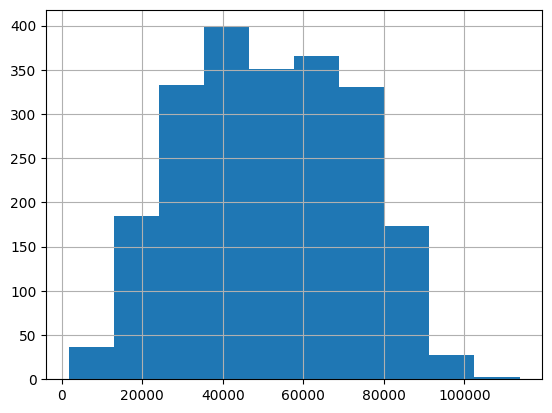

In [59]:
ifood['Income'].hist()

<Axes: xlabel='Income', ylabel='Count'>

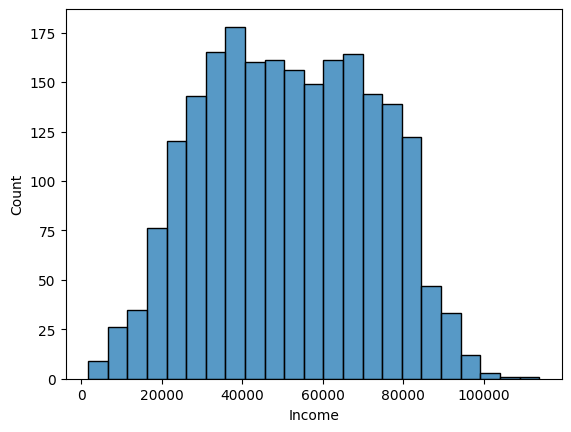

In [60]:
sns.histplot(ifood['Income'])

<Axes: ylabel='Income'>

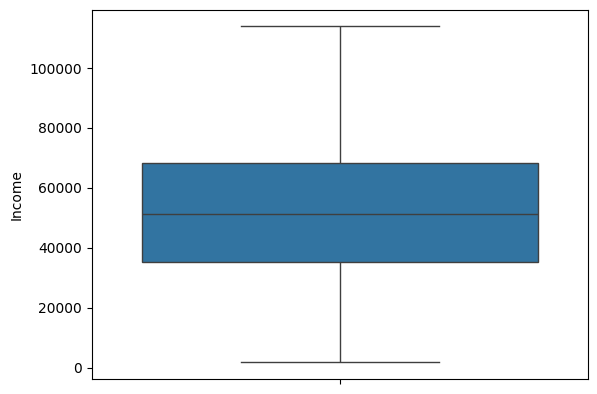

In [61]:
sns.boxplot(ifood['Income'])

In [62]:
ifood['Income'].var()

429031013.0549865

In [63]:
# Nossos clientes tem níveis de educação maiores ou menores?
ifood['education_level'].value_counts()

,count
education_level,
Graduation,1113
PhD,476
Master,364
2n Cycle,198
Basic,54


<Axes: >

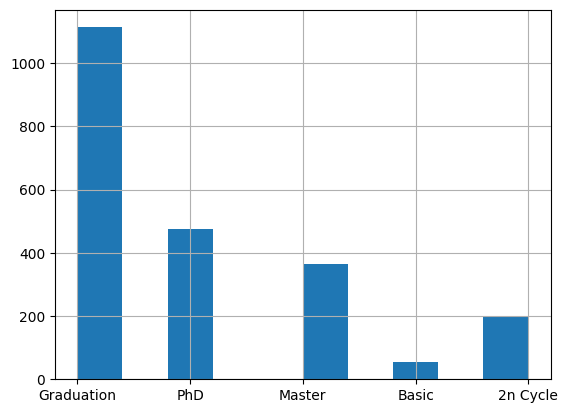

In [64]:
ifood['education_level'].hist()

<Axes: xlabel='education_level', ylabel='Count'>

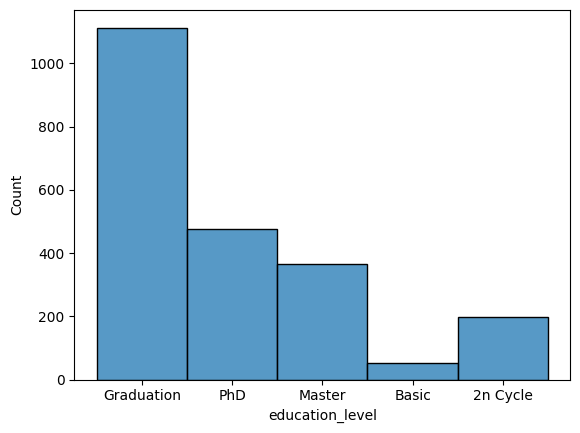

In [65]:
sns.histplot(ifood['education_level'])

In [66]:
# Quantos clientes temos em cada estado civil?
ifood['marital_status'].value_counts()

,count
marital_status,
Married,854
Together,568
Single,477
Divorced,230
Widow,76


<Axes: xlabel='marital_status', ylabel='Count'>

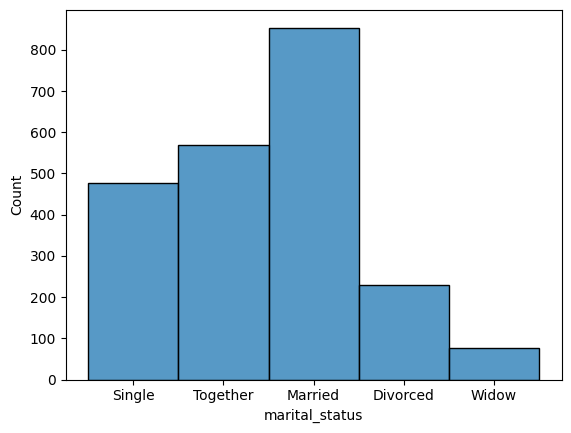

In [69]:
sns.histplot(ifood['marital_status'])

In [70]:
# Qual é a relação de estado civil com número de filhos? Será que as pessoas casadas têm um maior número de filhos?
ifood.groupby('marital_status')['kids'].mean()

,kids
marital_status,
Divorced,1.008696
Married,0.967213
Single,0.859539
Together,0.980634
Widow,0.881579


<Axes: xlabel='marital_status'>

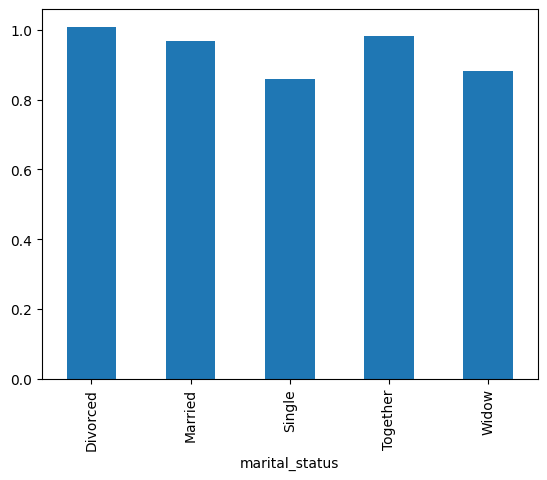

In [71]:
media_kids = ifood.groupby('marital_status')['kids'].mean()
media_kids.plot(kind='bar')

In [72]:
# As pessoas gastam mais ou menos em nossa plataforma quando têm filhos?
ifood.groupby('kids')['expenses'].mean()

,expenses
kids,
0,1041.207006
1,434.530576
2,221.568675
3,237.380000


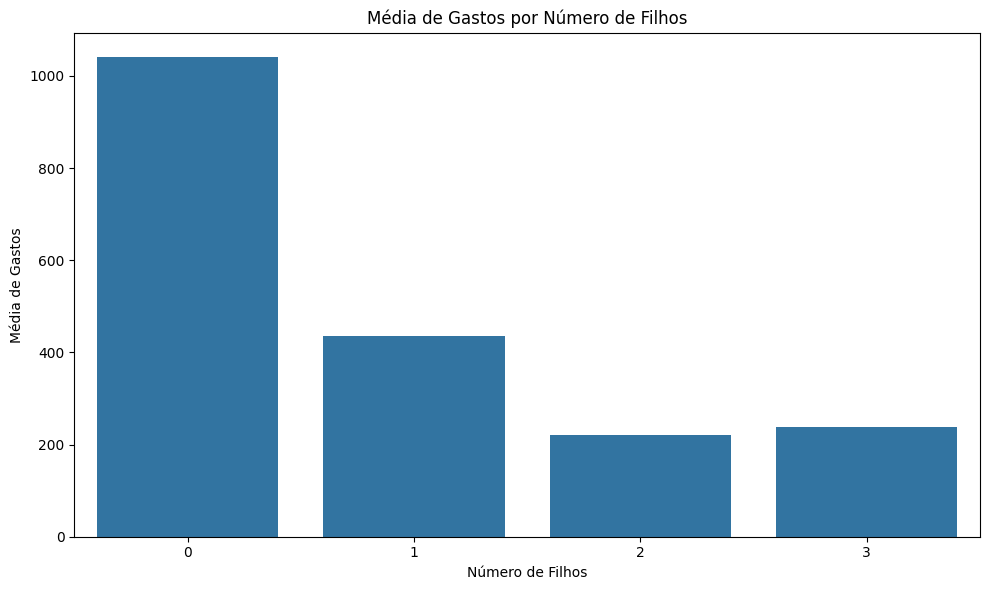

In [73]:
# Calcular a média de gastos por número de filhos
media_gastos_por_filhos = ifood.groupby('kids')['expenses'].mean()

# Criar um gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x=media_gastos_por_filhos.index, y=media_gastos_por_filhos.values)
plt.title('Média de Gastos por Número de Filhos')
plt.xlabel('Número de Filhos')
plt.ylabel('Média de Gastos')
plt.tight_layout()
plt.show()

In [74]:
# Pessoas que têm um maior salário gastam mais?
ifood.groupby('Income')['expenses'].mean()

,expenses
Income,
1730.0,7.0
2447.0,1729.0
3502.0,4.0
4023.0,8.0
4428.0,38.0
...,...
101970.0,967.0
102160.0,1182.0
102692.0,964.0


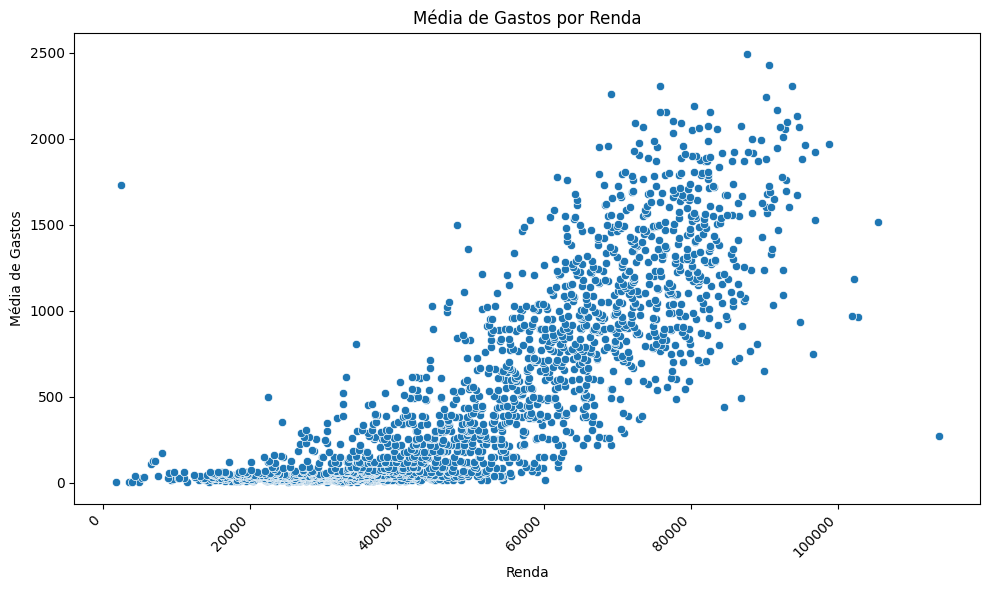

In [77]:
# Calcular media de gastos por renda
media_gastos = ifood.groupby('Income')['expenses'].mean().sort_values()

# Criar um gráfico de barras
plt.figure(figsize=(10, 6))
sns.scatterplot(x=media_gastos.index, y=media_gastos.values)
plt.title('Média de Gastos por Renda')
plt.xlabel('Renda')
plt.ylabel('Média de Gastos')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Problemas de Segmentação de Clientes:

Problema: Como segmentar os clientes do Ifood para campanhas de marketing mais eficazes?

Perguntas:

Quais os perfis de clientes mais comuns na base de dados (em termos de renda, educação, estado civil, número de filhos)?

Existem grupos de clientes com gastos e preferências de produtos semelhantes?

Quais as características dos clientes que mais gastam na plataforma?

Como podemos segmentar os clientes com base em suas necessidades e comportamentos?

In [82]:
# Segmentação de Renda: Dividir os clientes em faixas de renda (alta, média, baixa).

renda_alta = ifood['Income'].quantile(0.75)  # 75º percentil
renda_baixa = ifood['Income'].quantile(0.25)  # 25º percentil

# Criar a coluna 'segmento_renda'
ifood['segmento_renda'] = pd.cut(ifood['Income'],
                               bins=[-float('inf'), renda_baixa, renda_alta, float('inf')],
                               labels=['Baixa', 'Média', 'Alta'])

# Verificar a distribuição dos segmentos
print(ifood['segmento_renda'].value_counts())

segmento_renda
Média    1101
Baixa     553
Alta      551
Name: count, dtype: int64


In [83]:
ifood.head()

,Unnamed: 0,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,marital_status,education_level,kids,expenses,segmento_renda
0,0,58138.0,0,0,58,635,88,546,172,88,...,4.0,5.0,1529,1441,0,Single,Graduation,0,1529,Média
1,1,46344.0,1,1,38,11,1,6,2,1,...,4.0,5.0,21,15,0,Single,Graduation,2,21,Média
2,2,71613.0,0,0,26,426,49,127,111,21,...,4.0,5.0,734,692,0,Together,Graduation,0,734,Alta
3,3,26646.0,1,0,26,11,4,20,10,3,...,4.0,5.0,48,43,0,Together,Graduation,1,48,Baixa
4,4,58293.0,1,0,94,173,43,118,46,27,...,4.0,5.0,407,392,0,Married,PhD,1,407,Média


In [84]:
ifood.groupby('segmento_renda')['expenses'].mean()

<ipython-input-84-6ce7b91c8bee>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ifood.groupby('segmento_renda')['expenses'].mean()


,expenses
segmento_renda,
Baixa,64.764919
Média,447.197094
Alta,1293.497278


<Axes: >

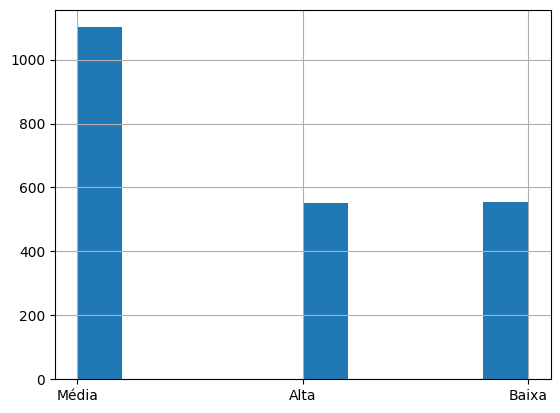

In [85]:
ifood['segmento_renda'].hist()